# Decision Trees

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<img src="./images/decision_tree.png"/>

## Building decision trees

<img src="./images/two_moons.png"/>

<img src="./images/depth_1.png"/>

<img src="./images/depth_2.png">

<img src="./images/depth_9.png">

---

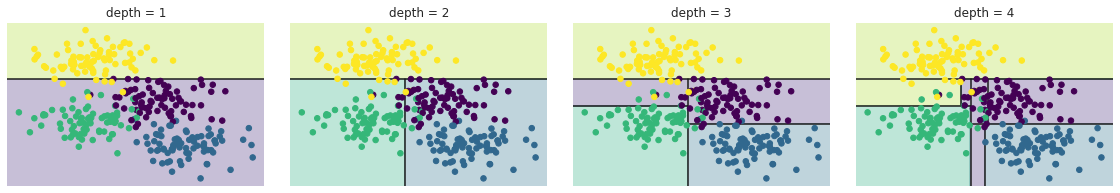

In [2]:
from helpers import helpers_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    helpers_tree.visualize_tree(model, X, y, ax=axi)
    axi.set_title(f'depth = {depth}')

plt.show()

---

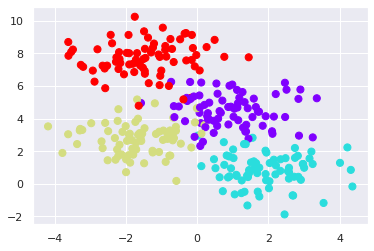

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

In [5]:
from helpers import helpers_tree

helpers_tree.plot_tree_interactive(X, y)
plt.show()

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=5)…

## Controlling complexity of decision trees

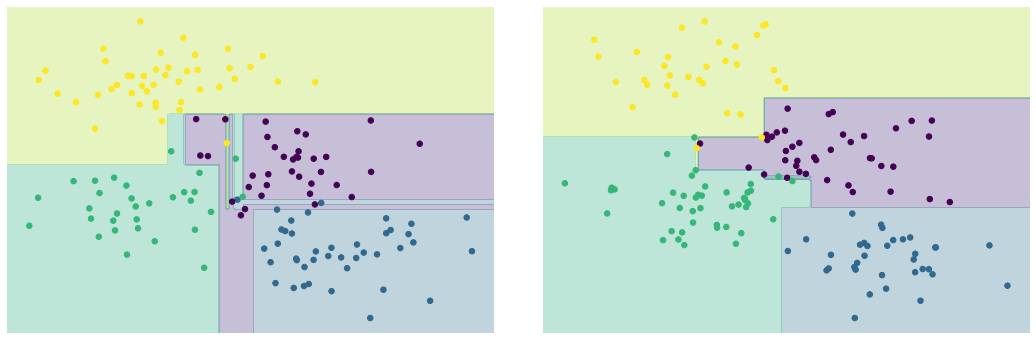

In [8]:
from helpers import helpers_tree

model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
helpers_tree.visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
helpers_tree.visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [13]:
tree.tree_.max_depth 

7

In [15]:
import sklearn
#help(sklearn.tree._tree.Tree)

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


---

In [17]:
traning_scores = {}
testing_scores = {}

depths = list(range(1,10))

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    traning_scores[depth] = tree.score(X_train, y_train)
    testing_scores[depth] = tree.score(X_test, y_test)

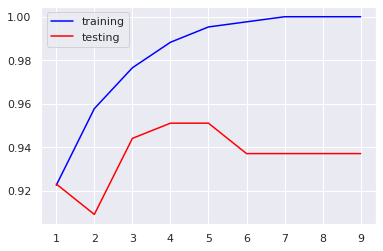

In [18]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()

## Analyzing decision trees

In [19]:
from sklearn.tree import export_graphviz

In [20]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="data/tree.dot", 
                class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

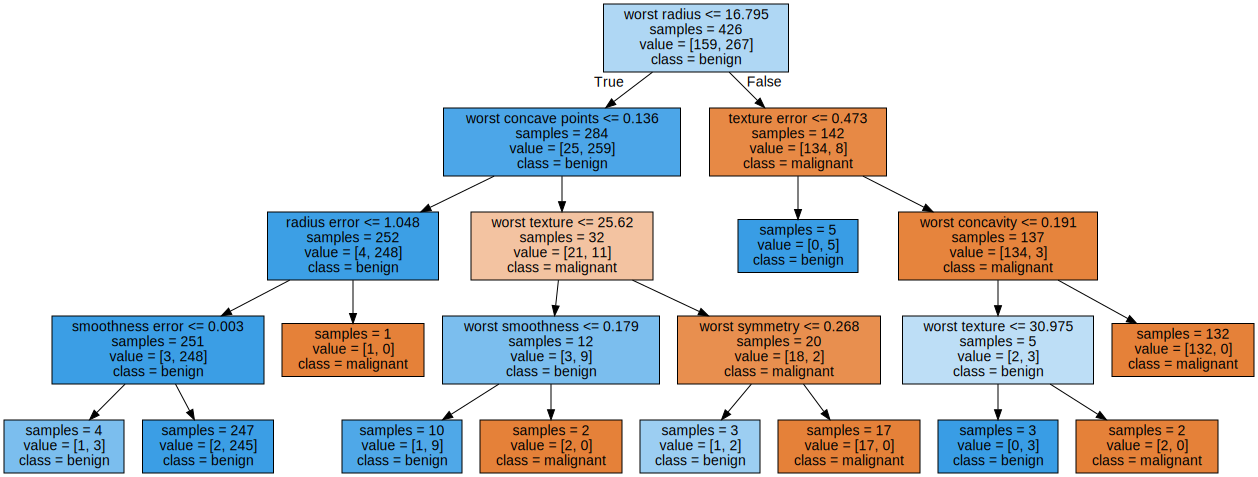

In [21]:
import graphviz

with open("data/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## Feature importance in trees

In [22]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

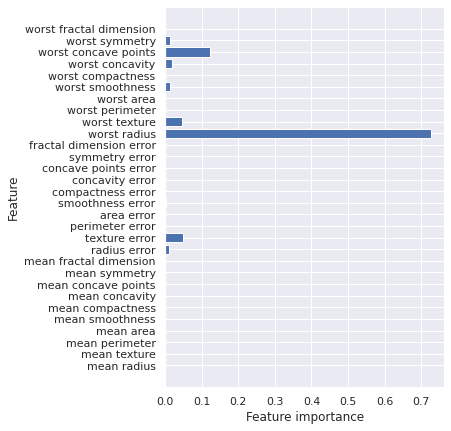

In [23]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(5, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(tree)

## Decision trees for regression

In [41]:
ram_prices = pd.read_csv("data/ram_price.csv", index_col=0)

In [42]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [43]:
ram_prices.tail()

,date,price
328,2015.58,0.0045
329,2015.67,0.0043
330,2015.75,0.0042
331,2015.83,0.0038
332,2015.92,0.0037


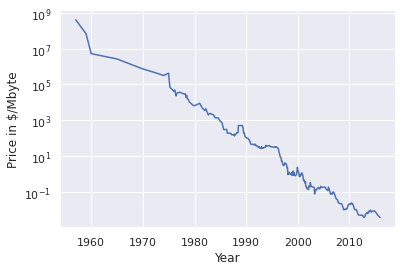

In [44]:
plt.semilogy(ram_prices["date"], ram_prices["price"])
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices["date"] < 2000]
data_test = ram_prices[ram_prices["date"] >= 2000]

In [54]:
# predict prices based on date
X_train = data_train["date"].values.reshape(data_train.shape[0] , 1)

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train["price"])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [55]:
# predict on all data
X_all = ram_prices["date"].values.reshape(ram_prices.shape[0], 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [56]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

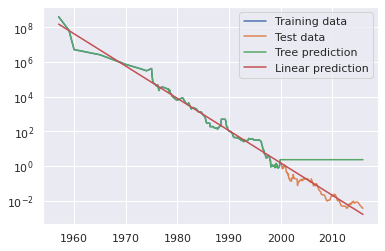

In [57]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

## Strengths, weaknesses, and parameters